In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the 'Customer Churn Problem' data

CustChurn_T = pd.read_csv(r"Churn_Modelling.csv", header=0)
CustChurn_T.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Copy 10% data (stratified split on target variable) to new dataset 

CustChurn = CustChurn_T.groupby('Exited', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Display the shape

CustChurn.shape

(1000, 14)

In [4]:
# Re-set the index

CustChurn = CustChurn.reset_index(drop=True)

# Copy to back-up file

CustChurn_bk = CustChurn.copy()

# Display information of the dataset

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        1000 non-null   int64  
 1   CustomerId       1000 non-null   int64  
 2   Surname          1000 non-null   object 
 3   CreditScore      1000 non-null   int64  
 4   Geography        1000 non-null   object 
 5   Gender           1000 non-null   object 
 6   Age              1000 non-null   int64  
 7   Tenure           1000 non-null   int64  
 8   Balance          1000 non-null   float64
 9   NumOfProducts    1000 non-null   int64  
 10  HasCrCard        1000 non-null   int64  
 11  IsActiveMember   1000 non-null   int64  
 12  EstimatedSalary  1000 non-null   float64
 13  Exited           1000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 109.5+ KB


In [5]:
# Display the Exited varibale count

CustChurn_T['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
# Display the Exited varibale count

CustChurn['Exited'].value_counts()

0    796
1    204
Name: Exited, dtype: int64

In [7]:
# Check if there are duplicate rows in the dataset

CustChurn.duplicated().any()

False

In [8]:
# Drop the variables which are not infulencing on target variable

CustChurn = CustChurn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
# Display the information of dataset

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      1000 non-null   int64  
 1   Geography        1000 non-null   object 
 2   Gender           1000 non-null   object 
 3   Age              1000 non-null   int64  
 4   Tenure           1000 non-null   int64  
 5   Balance          1000 non-null   float64
 6   NumOfProducts    1000 non-null   int64  
 7   HasCrCard        1000 non-null   int64  
 8   IsActiveMember   1000 non-null   int64  
 9   EstimatedSalary  1000 non-null   float64
 10  Exited           1000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 86.1+ KB


In [10]:
# Display the Geography varibles count

CustChurn['Geography'].value_counts()

France     501
Germany    253
Spain      246
Name: Geography, dtype: int64

In [11]:
# Display the Gender varibale count

CustChurn['Gender'].value_counts()

Male      533
Female    467
Name: Gender, dtype: int64

In [12]:
# Convert 'Geography' and 'Gender' to numerical format using one hot encoding

CustChurn = pd.get_dummies(CustChurn, columns=['Geography', 'Gender'])
CustChurn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,481,44,3,163714.52,1,1,0,96123.72,0,0,1,0,0,1
1,659,36,4,132578.92,2,1,0,84320.94,0,0,1,0,0,1
2,634,24,8,103097.85,1,1,1,157577.29,0,0,1,0,0,1
3,585,39,7,0.00,2,1,0,2401.26,0,1,0,0,1,0
4,666,33,2,147229.65,1,1,1,56410.17,0,1,0,0,1,0


In [13]:
# Display the information of dataset after conversion of variables

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1000 non-null   int64  
 1   Age                1000 non-null   int64  
 2   Tenure             1000 non-null   int64  
 3   Balance            1000 non-null   float64
 4   NumOfProducts      1000 non-null   int64  
 5   HasCrCard          1000 non-null   int64  
 6   IsActiveMember     1000 non-null   int64  
 7   EstimatedSalary    1000 non-null   float64
 8   Exited             1000 non-null   int64  
 9   Geography_France   1000 non-null   uint8  
 10  Geography_Germany  1000 non-null   uint8  
 11  Geography_Spain    1000 non-null   uint8  
 12  Gender_Female      1000 non-null   uint8  
 13  Gender_Male        1000 non-null   uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 75.3 KB


In [14]:
# Display the target varibale count

CustChurn['Exited'].value_counts()

0    796
1    204
Name: Exited, dtype: int64

In [15]:
# Convert the target data type into category variable

CustChurn['Exited'] = CustChurn['Exited'].astype("category")

In [16]:
# Identify the Independent and Target variables

IndepVar = []
for col in CustChurn.columns:
    if col != 'Exited':
        IndepVar.append(col)

TargetVar = 'Exited'

x = CustChurn[IndepVar]
y = CustChurn[TargetVar]

In [17]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape the training and testing data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 13), (300, 13), (700,), (300,))

In [18]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [33]:
# Load the Hyperparameter tunining result dataset

HTResults = pd.read_csv(r"E:\SDP-2\S15-Hyperparameter Tuning\HTResults.csv", header=0)
HTResults.head()

,Model Name,True _Positive,False _Negative,False _Positive,True _Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Confusion matrix : 
 [[ 24  44]
 [  6 226]]
Outcome values : 
 24 44 6 226
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.35      0.49        68
           0       0.84      0.97      0.90       232

    accuracy                           0.83       300
   macro avg       0.82      0.66      0.70       300
weighted avg       0.83      0.83      0.81       300

Accuracy : 83.3 %
Precision : 80.0 %
Recall : 35.3 %
F1 Score : 0.49
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 66.4 %
MCC : 0.456
roc_auc_score: 0.664


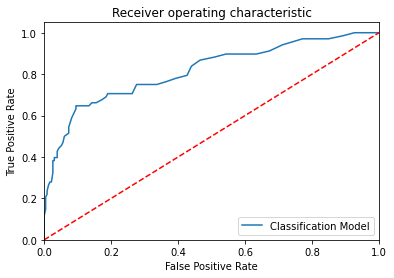

-----------------------------------------------------------------------------------------------------


In [34]:
# To build the 'RandomForestClassifier' model with random sampling

from sklearn.ensemble import RandomForestClassifier

ModelRF1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF1.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF1.predict(x_test)
y_pred_prob = ModelRF1.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF1,
           'True _Positive': tp,
           'False _Negative': fn, 
           'False _Positive': fp, 
           'True _Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(actual, predicted),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [35]:
HTResults.head()

,Model Name,True _Positive,False _Negative,False _Positive,True _Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",24,44,6,226,0.833,0.8,0.353,0.49,0.974,0.456,0.66354,0.664


# Hyperparameter tuning by GridSearchCV

In [37]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
GS_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create object for model

ModelRF2 = RandomForestClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelRF2, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [38]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [39]:
# Display of best parameter

best_grid = Grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=3,
                       min_samples_split=4)

Confusion matrix : 
 [[ 25  43]
 [  7 225]]
Outcome values : 
 25 43 7 225
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.37      0.50        68
           0       0.84      0.97      0.90       232

    accuracy                           0.83       300
   macro avg       0.81      0.67      0.70       300
weighted avg       0.83      0.83      0.81       300

Accuracy : 83.3 %
Precision : 78.1 %
Recall : 36.8 %
F1 Score : 0.5
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 66.9 %
MCC : 0.458
roc_auc_score: 0.669


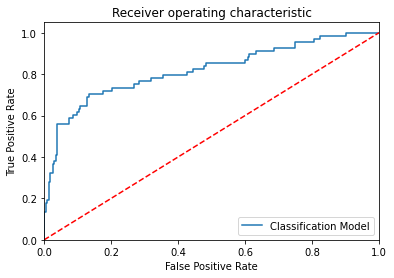

-----------------------------------------------------------------------------------------------------


In [42]:
# To build the 'RandomForestClassifier' model with random sampling with Hyperparametr tuning with gridseachCV

from sklearn.ensemble import RandomForestClassifier

ModelRF3 = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, min_samples_split=3,
                                  min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=3, 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF3.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF3.predict(x_test)
y_pred_prob = ModelRF3.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF3.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF3,
           'True _Positive': tp,
           'False _Negative': fn, 
           'False _Positive': fp, 
           'True _Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(actual, predicted),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [43]:
HTResults.head()

,Model Name,True _Positive,False _Negative,False _Positive,True _Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,"(DecisionTreeClassifier(max_features='sqrt', r...",24,44,6,226,0.833,0.8,0.353,0.49,0.974,0.456,0.66354,0.664,NaN,NaN,NaN,NaN
1,"(DecisionTreeClassifier(max_depth=10, max_feat...",NaN,NaN,NaN,NaN,0.837,0.828,0.353,0.495,0.978,0.47,0.665695,0.666,44.0,5.0,227.0,24.0
2,"(DecisionTreeClassifier(max_depth=10, max_feat...",25,43,7,225,0.833,0.781,0.368,0.5,0.97,0.458,0.668737,0.669,NaN,NaN,NaN,NaN


# Hyperparameter tuning with RandomizedSearchCV

In [44]:
# Hyperparameter tuning using RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # number of trees in the random forest 
max_features = ['auto', 'sqrt', 'log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [45]:
# Importing Random Forest Classifier from the sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

ModelRF4 = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = ModelRF4,param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

# Fit the model with train data

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=35, verbose=2)

In [46]:
# Print the best parameters

print ('Random grid: ', random_grid, '\n')

# print the best parameters

print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}  



In [47]:
#Best Parameters:  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 
#                   'max_depth': 20, 'bootstrap': False}  

Confusion matrix : 
 [[  0  68]
 [  0 232]]
Outcome values : 
 0 68 0 232
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        68
           0       0.77      1.00      0.87       232

    accuracy                           0.77       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.60      0.77      0.67       300

Accuracy : 77.3 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


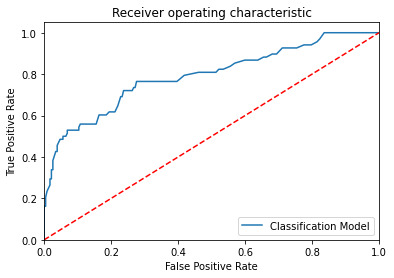

-----------------------------------------------------------------------------------------------------


In [48]:
# To build the 'RandomForestClassifier' model with random sampling with Hyperparametr tuning with RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

ModelRF5 = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=1, min_samples_split=10,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF5.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF5.predict(x_test)
y_pred_prob = ModelRF5.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF5.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF5,
           'True _Positive': tp,
           'False _Negative': fn, 
           'False _Positive': fp, 
           'True _Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(actual, predicted),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [49]:
HTResults.head()

,Model Name,True _Positive,False _Negative,False _Positive,True _Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,"(DecisionTreeClassifier(max_features='sqrt', r...",24,44,6,226,0.833,0.8,0.353,0.49,0.974,0.456,0.66354,0.664,NaN,NaN,NaN,NaN
1,"(DecisionTreeClassifier(max_depth=10, max_feat...",NaN,NaN,NaN,NaN,0.837,0.828,0.353,0.495,0.978,0.47,0.665695,0.666,44.0,5.0,227.0,24.0
2,"(DecisionTreeClassifier(max_depth=10, max_feat...",25,43,7,225,0.833,0.781,0.368,0.5,0.97,0.458,0.668737,0.669,NaN,NaN,NaN,NaN
3,"(DecisionTreeClassifier(max_depth=1, max_featu...",0,68,0,232,0.773,NaN,0.0,0.0,1.0,NaN,0.5,0.5,NaN,NaN,NaN,NaN
